# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tagta
Processing Record 2 of Set 1 | kyshtovka
Processing Record 3 of Set 1 | puerto aysen
Processing Record 4 of Set 1 | illizi
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | saipan
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | lulea
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | narasannapeta
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | pochep
Processing Record 13 of Set 1 | formby
Processing Record 14 of Set 1 | tanjungtiram
Processing Record 15 of Set 1 | aras-asan
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | boa vista
Processing Record 19 of Set 1 | rawson
Processing Record 20 of Set 1 | taro
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | bethel
Processing R

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tagta,41.6504,59.9164,33.63,22,18,5.39,TM,1717992415
1,kyshtovka,56.5550,76.6271,18.52,62,100,4.47,RU,1717992415
2,puerto aysen,-45.4000,-72.7000,6.98,100,100,0.22,CL,1717992415
3,illizi,26.4833,8.4667,30.45,8,0,4.64,DZ,1717992415
4,yellowknife,62.4560,-114.3525,12.31,58,99,2.31,CA,1717992416


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tagta,41.6504,59.9164,33.63,22,18,5.39,TM,1717992415
1,kyshtovka,56.5550,76.6271,18.52,62,100,4.47,RU,1717992415
2,puerto aysen,-45.4000,-72.7000,6.98,100,100,0.22,CL,1717992415
3,illizi,26.4833,8.4667,30.45,8,0,4.64,DZ,1717992415
4,yellowknife,62.4560,-114.3525,12.31,58,99,2.31,CA,1717992416


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

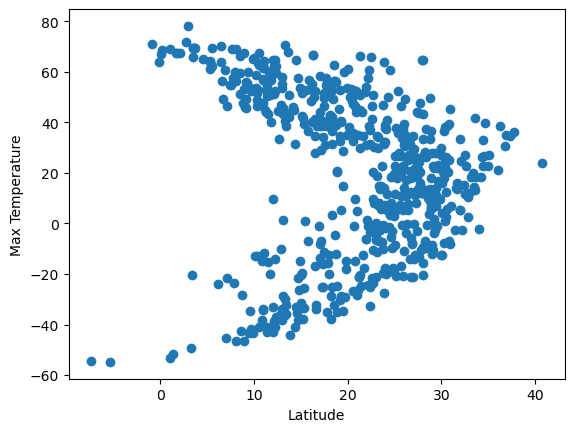

In [38]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

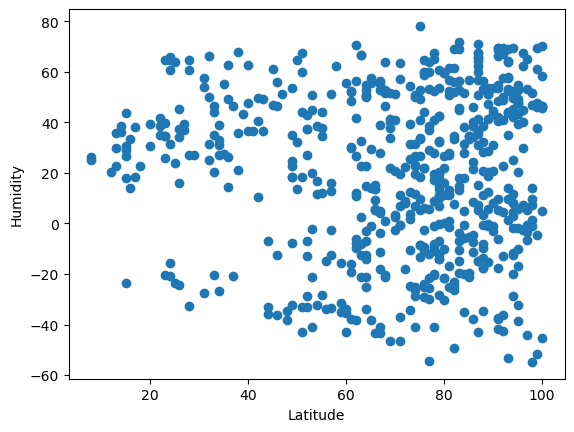

In [39]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])
# Incorporate the other gra
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

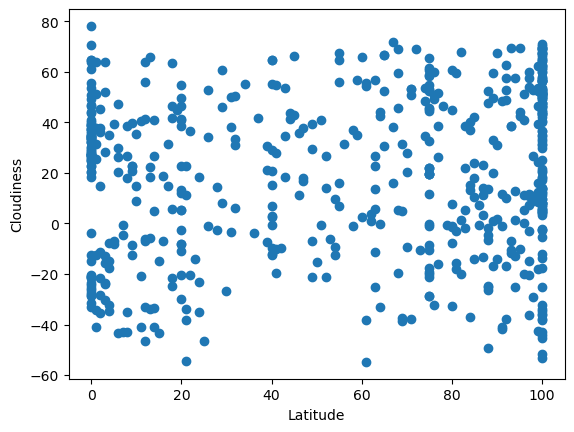

In [40]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

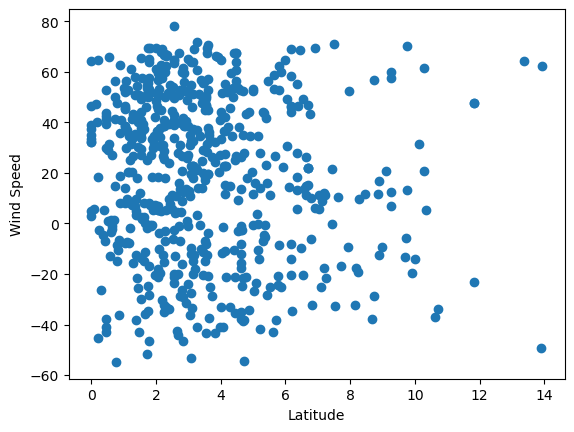

In [41]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tagta,41.6504,59.9164,33.63,22,18,5.39,TM,1717992415
1,kyshtovka,56.5550,76.6271,18.52,62,100,4.47,RU,1717992415
3,illizi,26.4833,8.4667,30.45,8,0,4.64,DZ,1717992415
4,yellowknife,62.4560,-114.3525,12.31,58,99,2.31,CA,1717992416
5,saipan,15.1355,145.7010,32.39,66,40,6.69,MP,1717992416


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto aysen,-45.4000,-72.7000,6.98,100,100,0.22,CL,1717992415
8,edinburgh of the seven seas,-37.0676,-12.3116,12.33,71,84,10.63,SH,1717992416
10,port-aux-francais,-49.3500,70.2167,3.27,82,88,13.89,TF,1717992417
15,margaret river,-33.9500,115.0667,16.64,56,100,10.71,AU,1717992174
16,alice springs,-23.7000,133.8833,22.75,25,0,2.57,AU,1717992418


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7134027229160258


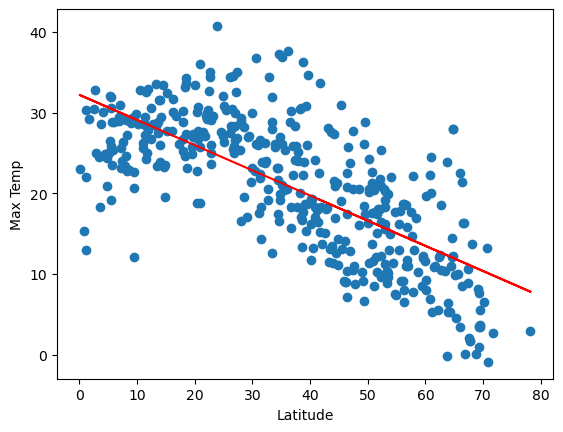

In [45]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.7405779710230864


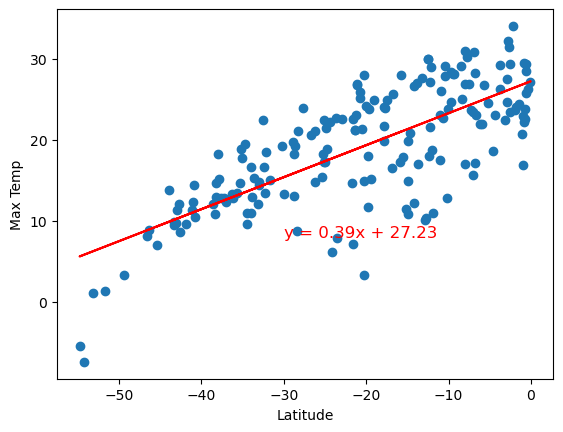

In [46]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0162352863052719


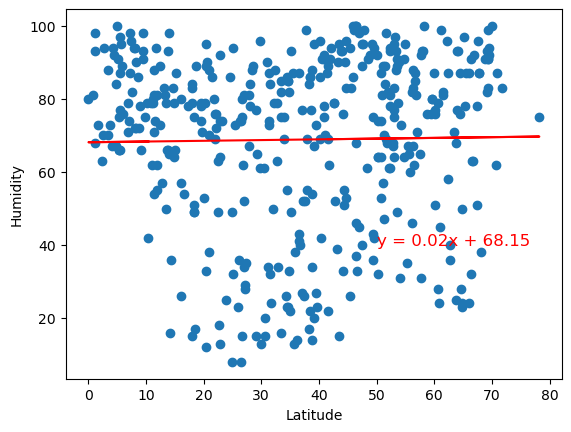

In [47]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))


The r-value is: 0.13067263767531906


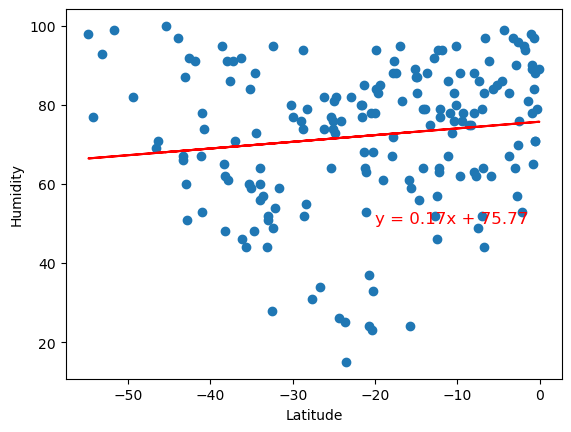

In [48]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.057844673172209295


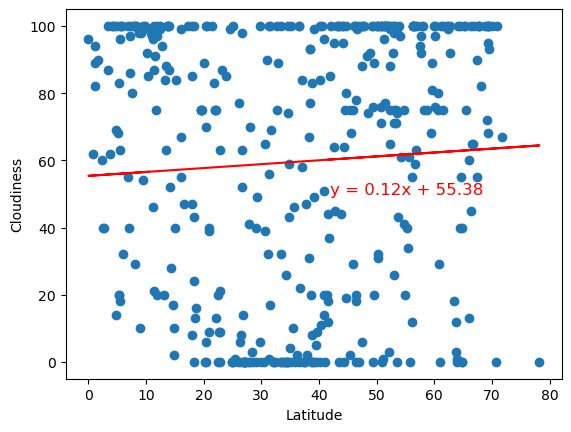

In [49]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.028199709630387145


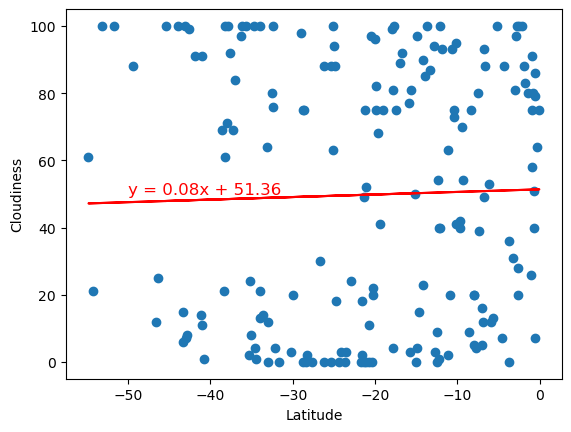

In [50]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0010320578379385019


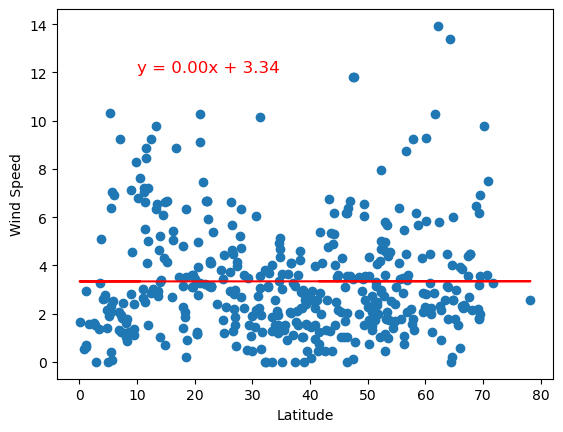

In [51]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.05211530557973941


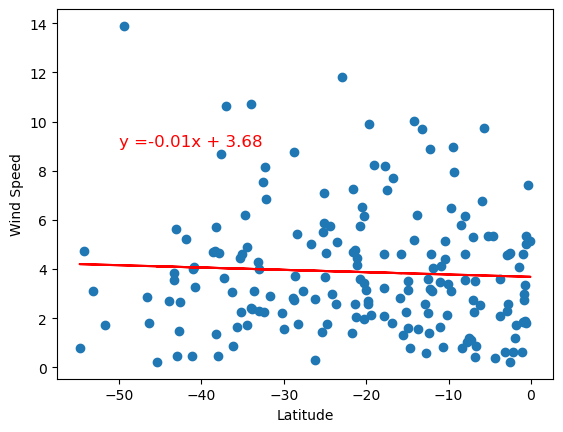

In [52]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** There is kind of none relationship between wind speed and lattitude in northern hemisphere 
There is kind of low relationship relationship between wind speed and lattitude in souther hemisphere.